# Logistic regression with scikit-learn: heart disease data set

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read data 

In [82]:
# filename = "heart.csv"
filename = "https://www.physi.uni-heidelberg.de/~reygers/lectures/2021/ml/data/heart.csv"
df = pd.read_csv(filename)
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [83]:
y = df['target'].values
X = df[[col for col in df.columns if col!="target"]]

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True, random_state=42)

### Fit the model

In [85]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='none', fit_intercept=True, max_iter=5000, tol=1E-5)
%time lr.fit(X_train, y_train)

CPU times: user 427 ms, sys: 14.1 ms, total: 441 ms
Wall time: 587 ms


LogisticRegression(max_iter=5000, penalty='none', tol=1e-05)

### Test predictions on test data set

In [86]:
from sklearn.metrics import classification_report
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79        69
           1       0.81      0.87      0.84        83

    accuracy                           0.82       152
   macro avg       0.82      0.81      0.81       152
weighted avg       0.82      0.82      0.81       152



### Compare two classifiers using the ROC curve

In [87]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=3)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

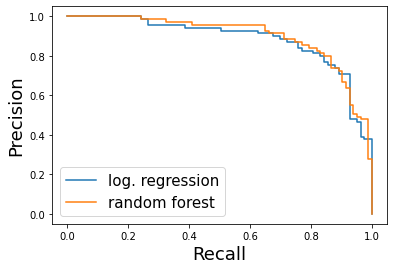

In [88]:
from sklearn.metrics import roc_curve

y_pred_prob_lr = lr.predict_proba(X_test) # predicted probabilities
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr[:,1])

y_pred_prob_rf = rf.predict_proba(X_test) # predicted probabilities
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf[:,1])

plt.plot(tpr_lr, 1-fpr_lr, label="log. regression")
plt.plot(tpr_rf, 1-fpr_rf, label="random forest")

plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18);
plt.legend(fontsize=15)

plt.savefig("03_ml_basics_log_regr_heart_disease.pdf")

In [89]:
from sklearn.metrics import roc_auc_score
auc_lr = roc_auc_score(y_test,y_pred_lr)
auc_rf = roc_auc_score(y_test,y_pred_rf)
print(f"Area under Curve (AUC) scores: {auc_lr:.2f}, {auc_rf:.2f}")

Area under Curve (AUC) scores: 0.81, 0.81


# Check wether data preprocessing makes a difference in this case

In [93]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipe = make_pipeline(StandardScaler(), LogisticRegression(penalty='none', fit_intercept=False, max_iter=5000, tol=1E-5))
%time pipe.fit(X_train, y_train)
y_pred_pipe = pipe.predict(X_test)
print(classification_report(y_test, y_pred_pipe))

CPU times: user 22.4 ms, sys: 2.89 ms, total: 25.3 ms
Wall time: 27.6 ms
              precision    recall  f1-score   support

           0       0.80      0.81      0.81        70
           1       0.84      0.83      0.83        82

    accuracy                           0.82       152
   macro avg       0.82      0.82      0.82       152
weighted avg       0.82      0.82      0.82       152



In [91]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79        69
           1       0.81      0.87      0.84        83

    accuracy                           0.82       152
   macro avg       0.82      0.81      0.81       152
weighted avg       0.82      0.82      0.81       152

